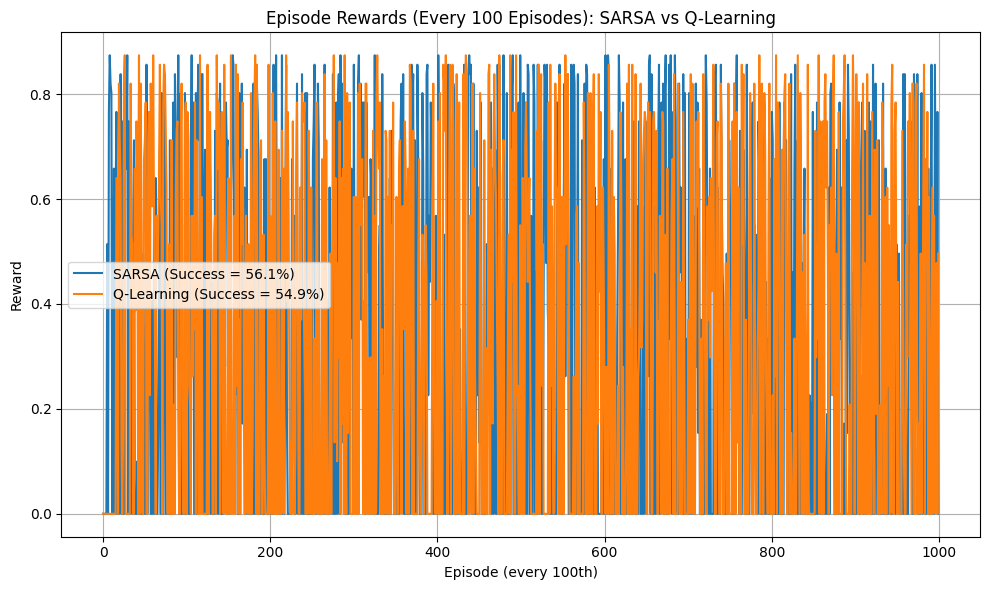

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 두 CSV 파일 불러오기
sarsa_df = pd.read_csv("./logs/rewards_sarsa_empty.csv")
qlearn_df = pd.read_csv("./logs/rewards_qlearning_empty.csv")

# 리워드 값 추출
sarsa_rewards = sarsa_df.iloc[:, 1].values
qlearn_rewards = qlearn_df.iloc[:, 1].values

# 성공률 계산 (보상 > 0 을 성공으로 정의)
sarsa_success = (sarsa_rewards > 0).mean() * 100
qlearn_success = (qlearn_rewards > 0).mean() * 100

# 100개마다 하나씩 다운샘플링
sarsa_sampled = sarsa_rewards[::100]
qlearn_sampled = qlearn_rewards[::100]
x = list(range(len(sarsa_sampled)))  # x축 에피소드 인덱스 (샘플 기준)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, sarsa_sampled, label=f"SARSA (Success = {sarsa_success:.1f}%)")
plt.plot(x, qlearn_sampled, label=f"Q-Learning (Success = {qlearn_success:.1f}%)")
plt.title("Episode Rewards (Every 100 Episodes): SARSA vs Q-Learning")
plt.xlabel("Episode (every 100th)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("compare_emp_ep.jpg", dpi=300, bbox_inches='tight')
plt.show()